In [3]:
# Execute before using this notebook if using google colab

kernel = str(get_ipython())

if 'google.colab' in kernel:    
    !wget https://raw.githubusercontent.com/fredzett/rmqa/master/utils.py -P local_modules -nc 
    !npx degit fredzett/rmqa/data data
    import sys
    sys.path.append('local_modules')

In [4]:
import numpy as np
import scipy.stats as stats
from utils import Datasets, plot_density, plot_hist, plot_line
import matplotlib.pyplot as plt
import seaborn as sns

# Excercise 1

Given the below data on two groups you want to test if the mean of both groups is equal. 

1. formulate a research hypothesis for this problem

2. test your hypothesis using a two sample t-test

3. calculate the sample distribution for your estimator

4. test your hypothesis using a bootstrap approach

5. what is your conclusion?

In [5]:
n = 10_000
group1 = stats.norm(100,2).rvs(n)
group2 = stats.norm(105,2).rvs(n)
np.mean(group1), np.mean(group2)

(100.00764719249781, 104.99738205065616)

## Solution 1

A research hypothesis could be:

The standard deviation of both groups differs. Therefore, commonly we would test:

$$H_0: \mu_1 = \mu_2$$
$$H_1: \mu_1 \neq \mu_2$$


In [6]:
stats.ttest_ind(group1,group2) # Conclusion: H0 can be rejected given the small p value

Ttest_indResult(statistic=-176.79741837791929, pvalue=0.0)

In [7]:
def boot(sims, g1,g2):
    'Assumes both groups have equal size'
    thetas = np.empty(sims)
    n = len(g1)
    for i in range(sims):
        smpl1 = np.random.choice(g1,size=n, replace=True)
        smpl2 = np.random.choice(g2, size=n, replace=True)
        thetas[i] = np.mean(smpl1) - np.mean(smpl2)
    return thetas
        

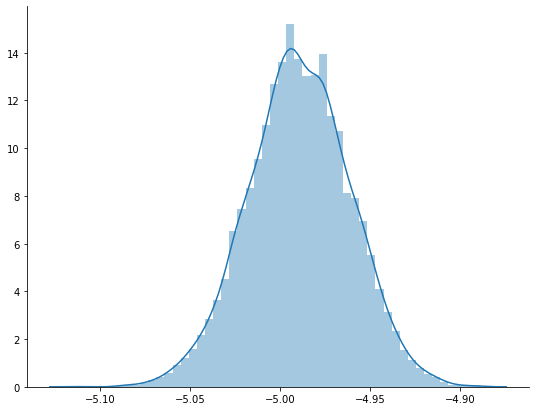

In [8]:
estimators = boot(10000, group1, group2)
plot_density(estimators);

In [9]:
np.quantile(estimators, [0.024999, 0.0975]) # Conclusion: the difference between group1 and group2 is with a probablity of 95% between the below values

array([-5.04608578, -5.02626827])

# Exercise 2

You are given the below dataset containing of car models (see [here](http://faculty.marshall.usc.edu/gareth-james/ISL/data.html) for original dataset). Four our purposes in this excercise the data contains two features for $392$ car models:

- mpg = miles per gallon of car model
 
- horsepower = horsepower of car model

Running a simple linear regression of form:

$$\text{mpg} \sim b_0 + b_1\text{horsepower} + \epsilon \\ \text{where } \epsilon \sim N(0,1)$$

yields that

- $b_0 = 39.936$
- $b_1 = -0.158$

**Questions:**  Using a bootstrap approach, calculate

- the mean (i.e. expected value) of both coefficients 

- the standard error of both coefficients 

- the estimate intervals for both coefficients using a confidence level of $95\%$



In [50]:
data  = Datasets.cars(dtype="numpy")
mpg, horsepower = data[:,0], data[:,1]

## Solution 2

In [51]:
def beta1(x,y):
    return np.sum((x - np.mean(x))*(y - np.mean(y))) / np.sum((x - np.mean(x))**2)

def beta0(x,y):
    xbar, ybar = np.mean(x), np.mean(y)
    b1 = beta1(x,y)
    return ybar - b1*xbar

In [52]:
def bootstrap_b0_b1(sims, x,y):
    n = len(x)
    thetas = np.empty((sims,2))
    for i in range(sims):
        idx = np.random.choice(range(n),n, replace=True)
        smpl_x, smpl_y = x[idx], y[idx]
        thetas[i,0] = beta0(smpl_x, smpl_y)
        thetas[i,1] = beta1(smpl_x, smpl_y)
    return thetas

In [53]:
thetas = bootstrap_b0_b1(10_000, horsepower, mpg)
b0, b1 = thetas[:,0], thetas[:, 1]

In [54]:
np.mean(b0), np.mean(b1)

(39.963190289092765, -0.15815316369192256)

In [56]:
np.std(b0), np.std(b1)

(0.8607226452744686, 0.007473520736660802)

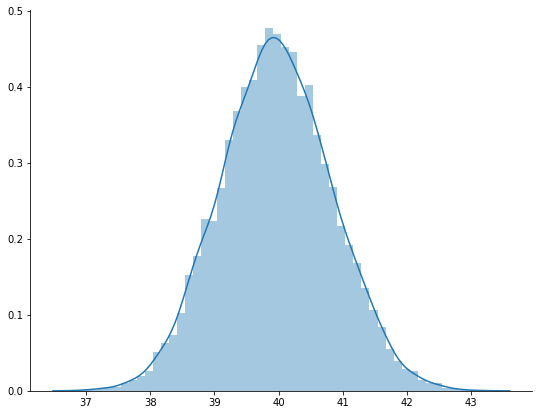

In [57]:
plot_density(b0);

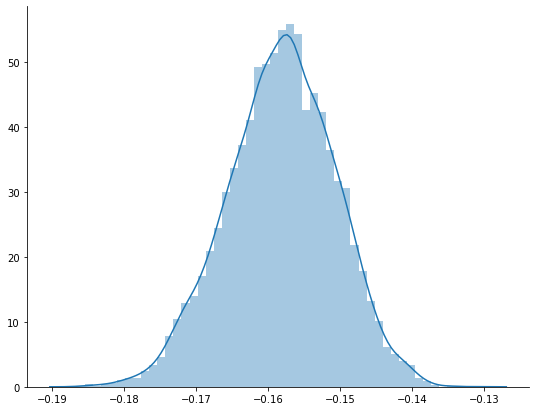

In [58]:
plot_density(b1);

In [59]:
np.quantile(b0, [0.025, 0.975]), np.quantile(b1, [0.025, 0.975])

(array([38.29941632, 41.65158148]), array([-0.17325248, -0.14417817]))